In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('tyler.csv')
df.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,artist
0,Goblin,1,2evuIbUcuoQvaxXyzd11mp,Goblin,spotify:track:2evuIbUcuoQvaxXyzd11mp,0.5340,0.456,0.529,0.000000,0.219,-12.651,0.828,78.235,0.444,9,"Tyler, the creator"
1,Goblin,2,4repMe7ou7bz7L33HQfuV0,Yonkers,spotify:track:4repMe7ou7bz7L33HQfuV0,0.0161,0.712,0.759,0.080800,0.217,-5.397,0.334,79.102,0.738,14,"Tyler, the creator"
2,Goblin,3,5VX4NUwY6Y2Tb282s5okwj,Radicals,spotify:track:5VX4NUwY6Y2Tb282s5okwj,0.1540,0.562,0.680,0.095500,0.269,-8.015,0.498,74.060,0.224,9,"Tyler, the creator"
3,Goblin,4,1bO2vxNEE0CTehNo4LoNIa,She,spotify:track:1bO2vxNEE0CTehNo4LoNIa,0.2560,0.350,0.621,0.000034,0.613,-6.495,0.233,83.375,0.459,19,"Tyler, the creator"
4,Goblin,5,3NwY1257odCmL1ncBr7fL0,Transylvania,spotify:track:3NwY1257odCmL1ncBr7fL0,0.0115,0.572,0.638,0.010400,0.201,-11.868,0.424,122.448,0.197,8,"Tyler, the creator"


In [3]:
df = df[['name','id','album','artist','energy','danceability','loudness', 'instrumentalness', 'popularity']]
df.head()

,name,id,album,artist,energy,danceability,loudness,instrumentalness,popularity
0,Goblin,2evuIbUcuoQvaxXyzd11mp,Goblin,"Tyler, the creator",0.529,0.456,-12.651,0.000000,9
1,Yonkers,4repMe7ou7bz7L33HQfuV0,Goblin,"Tyler, the creator",0.759,0.712,-5.397,0.080800,14
2,Radicals,5VX4NUwY6Y2Tb282s5okwj,Goblin,"Tyler, the creator",0.680,0.562,-8.015,0.095500,9
3,She,1bO2vxNEE0CTehNo4LoNIa,Goblin,"Tyler, the creator",0.621,0.350,-6.495,0.000034,19
4,Transylvania,3NwY1257odCmL1ncBr7fL0,Goblin,"Tyler, the creator",0.638,0.572,-11.868,0.010400,8


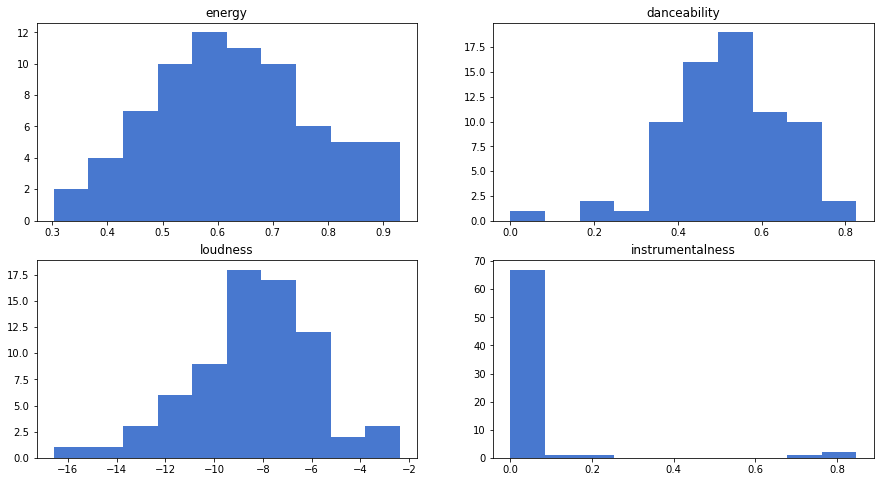

In [4]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['energy'])
axes[0,0].set_title('energy')
axes[0,1].hist(df['danceability'])
axes[0,1].set_title('danceability')
axes[1,0].hist(df['loudness'])
axes[1,0].set_title('loudness')
axes[1,1].hist(df['instrumentalness'])
axes[1,1].set_title('instrumentalness')
plt.show()

In [6]:
features = df.columns[4:8]

In [8]:
X = MinMaxScaler().fit_transform(df[features])

In [9]:
km = KMeans(init='k-means++', n_clusters=2, random_state=20).fit(X)

In [10]:
km.labels_

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0])

In [11]:
df['labels']= km.labels_

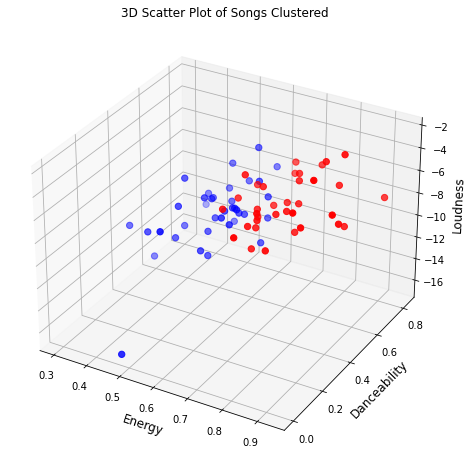

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['labels'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")
plt.show()

In [13]:
df.groupby(['labels']).mean()

,energy,danceability,loudness,instrumentalness,popularity
labels,,,,,
0,0.51073,0.545919,-10.012054,0.025374,45.162162
1,0.74740,0.494657,-6.504029,0.062359,50.000000


In [14]:
highEnergy_cluster = df[df['labels']==0]
lowEnergy_cluster = df[df['labels']==1]

highEnergy_cluster.to_csv('highEnergyClusterTyler.csv', index=False)
lowEnergy_cluster.to_csv('lowEnergyClusterTyler.csv', index=False)

In [15]:
import spotipy
from spotipy import SpotifyClientCredentials, util
import pandas as pd

In [16]:
client_id='<secret>'
client_secret='<secret>'
redirect_uri='http://localhost/callback'

username = '<secret>'
scope_playlist = 'playlist-modify-public'
scope_user = 'user-library-modify'
scope_playing = 'user-read-currently-playing'

#Credentials to access the Spotify Music Data
manager = SpotifyClientCredentials(client_id,client_secret)
sp = spotipy.Spotify(client_credentials_manager=manager)

#Credentials to access the actual song played
token_actual = util.prompt_for_user_token(username,scope_playing,client_id,client_secret,redirect_uri) 
sp_actual = spotipy.Spotify(auth=token_actual)

#Credentiasl to acces the library music 
token_user= util.prompt_for_user_token(username,scope_user,client_id,client_secret,redirect_uri) 
sp_user = spotipy.Spotify(auth=token_user)

#Credentiasl to acces the Playlists Music
token_playlist= util.prompt_for_user_token(username,scope_playlist,client_id,client_secret,redirect_uri) 
sp_playlist = spotipy.Spotify(auth=token_playlist)

Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to: http://localhost/callback?code=AQAbLTU5JHeothb9AAegffpGnUhOTMIh7eXeAp4Q4k4YgIhEf4gdNr-ugN93Nil7XEe0zPGSXqV6l3Gi5ScDy7izu8zd9oDw4AH9XL3cGXZuq2QKuYHTsGPc6Uvy3BzKrsatj0zvzfpjprQ9R9HI_4O7IG_Po0cPYTDyv7y6K21tQ8UxkodJWW6Y9X9MOdOvquaDt3DgoY3Mdw


Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to: http://localhost/callback?code=AQDC-6BZHbCdKtTlEPcIXrKMTkWZp5hAtlrnkXo0xtRrRI5JYDJ5Gpy076PBaoSpZVyUq1mwU94Gt_1tUUr_G2mWYAk1Y0zgqT31w1eF10OJXhowXWHx-205Nvh-aVtBPgpEm0RONCZIH9tpMQ10SPjhqiNmgptyz0yU1YodgxM9q9zlVdjblGBSAxCfdM9Qtl0


Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to: http://localhost/callback?code=AQCkmBpaHP6IjUNaZ7djQ-uJqIaWWLiIR9BfJsJzf3b5SfHUaZxBBw_NiyWDHH6hR87E5VvIDJn0s5-YG9w3mAVOIdZhNBRwWdAWjgxUK6zZ7O68ooefZ2cOU_S6eHSW4HXKtQQCrq9ZGE2tBGISvccEqfOIiyiTe78Iq6-_d1M35gkSJJNJGIhvHuHZkrShDlu8Sk0


In [17]:
high = pd.read_csv("highEnergyClusterTyler.csv")
low = pd.read_csv("lowEnergyClusterTyler.csv")
ids1 = high['id'].tolist()
ids2 = low['id'].tolist()

In [18]:
len(high)

37

In [19]:
len(low)

35

In [20]:
Tyler_HighEnergy = sp_playlist.user_playlist_create(username,"Tyler Energetic")
Tyler_LoeEnergy = sp_playlist.user_playlist_create(username,"Tyler Relaxing")

In [21]:
sp_playlist.user_playlist_add_tracks(username,'5YlCHh1aXlYSqG0yApGLH7',ids1)

{'snapshot_id': 'MiwxMjBhYWVkOGJkNGMyOTIwYzI1YWQ2MDg5ZWZlZmIwYzBkZTkyODM3'}

In [22]:
sp_playlist.user_playlist_add_tracks(username,'0h0drDaNNApUxP1PUFIdqC',ids2)

{'snapshot_id': 'MiwyYWFmYmI5ODIxZTIxZmE2MjRkN2Q0MmVkNzlkODNkZWI2YzIzMmQ0'}